In [70]:
import pandas as pd
import xlrd
pd.set_option('display.max_rows', 200)

In [71]:
peakers_data = pd.read_excel('peakers_startup_data.xlsx', skiprows=[0])
peakers_data.head(15)

,Unit #,Event Start Date,Event End Date,Time Elapsed (Hours),Event Description
0,1,2019-01-01 00:00:00,2019-01-07 06:00:00,150,Reserve Shutdown
1,1,2019-01-07 06:00:00,2019-01-29 08:00:00,530,Maintenance Outage
2,1,2019-01-29 08:00:00,2019-01-30 12:28:00,28,Reserve Shutdown
3,1,2019-01-30 12:28:00,2019-01-31 14:32:00,26,Forced Outage
4,1,2019-01-31 14:32:00,2019-04-15 06:00:00,1767,Reserve Shutdown
5,1,2019-04-15 06:00:00,2019-04-17 10:13:00,52,Planned Outage
6,1,2019-04-17 10:13:00,2019-05-29 07:00:00,1004,Reserve Shutdown
7,1,2019-05-29 07:00:00,2019-05-29 14:00:00,7,Planned Outage
8,1,2019-05-29 14:00:00,2019-08-12 09:00:00,1794,Reserve Shutdown
9,1,2019-08-12 09:00:00,2019-09-04 08:44:00,551,Maintenance Outage


In [72]:
peakers_data.dtypes

Unit #                           int64
Event Start Date        datetime64[ns]
Event End Date          datetime64[ns]
Time Elapsed (Hours)             int64
Event Description               object
dtype: object

In [73]:
peakers_data_by_stage = peakers_data.groupby('Event Description')['Unit #'].count().reset_index()
peakers_data_by_stage.rename({'Unit #': 'Total Occurrences'}, axis=1, inplace=True)
peakers_data_by_stage.head()

,Event Description,Total Occurrences
0,Forced Outage,3
1,Maintenance Outage,6
2,Planned Outage,9
3,Reserve Shutdown,32
4,Run,11


In [74]:
total_outages = peakers_data_by_stage.loc[peakers_data_by_stage['Event Description'] != 'Run']['Total Occurrences'].sum()
success_starts = peakers_data_by_stage.loc[peakers_data_by_stage['Event Description'] == 'Run']['Total Occurrences'].values[0]
successful_start_percent = (success_starts/(success_starts+total_outages)) * 100
print(success_starts)
print(successful_start_percent)

11
18.0327868852459


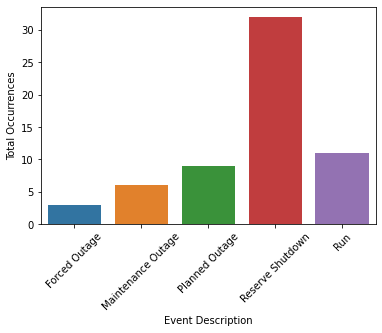

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x='Event Description', y='Total Occurrences', data=peakers_data_by_stage)

plt.xticks(rotation=45)
plt.show()

In [76]:
#### Don't consider reserve shutdown since it doesn't affect reliability in our case
peakers_data_wdt_rsrve = peakers_data.query("`Event Description` ! = 'Reserve Shutdown'").reset_index(drop=True)
peakers_data_wdt_rsrve.head()

,Unit #,Event Start Date,Event End Date,Time Elapsed (Hours),Event Description
0,1,2019-01-07 06:00:00,2019-01-29 08:00:00,530,Maintenance Outage
1,1,2019-01-30 12:28:00,2019-01-31 14:32:00,26,Forced Outage
2,1,2019-04-15 06:00:00,2019-04-17 10:13:00,52,Planned Outage
3,1,2019-05-29 07:00:00,2019-05-29 14:00:00,7,Planned Outage
4,1,2019-08-12 09:00:00,2019-09-04 08:44:00,551,Maintenance Outage


In [77]:
peakers_data_wdt_rsrve.dtypes

Unit #                           int64
Event Start Date        datetime64[ns]
Event End Date          datetime64[ns]
Time Elapsed (Hours)             int64
Event Description               object
dtype: object

In [78]:
peakers_data_wdt_rsrve_by_stage = peakers_data_wdt_rsrve.groupby('Event Description')['Unit #'].count().reset_index()
peakers_data_wdt_rsrve_by_stage.rename({'Unit #': 'Total Occurrences'}, axis=1, inplace=True)
peakers_data_wdt_rsrve_by_stage.head()

,Event Description,Total Occurrences
0,Forced Outage,3
1,Maintenance Outage,6
2,Planned Outage,9
3,Run,11


In [79]:
total_outages = peakers_data_wdt_rsrve_by_stage.loc[peakers_data_wdt_rsrve_by_stage['Event Description'] != 'Run']['Total Occurrences'].sum()
successful_starts = peakers_data_wdt_rsrve_by_stage.loc[peakers_data_wdt_rsrve_by_stage['Event Description'] == 'Run']['Total Occurrences'].values[0]
successful_start_percent = (success_starts/(success_starts+total_outages)) * 100
print(success_starts)
print(successful_start_percent)

11
37.93103448275862


<AxesSubplot:>

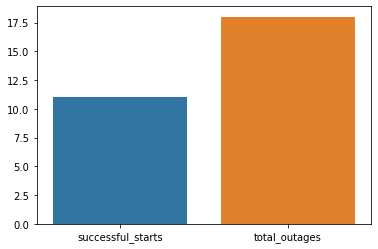

In [80]:
sns.barplot(x=['successful_starts', 'total_outages'], y=[success_starts, total_outages])

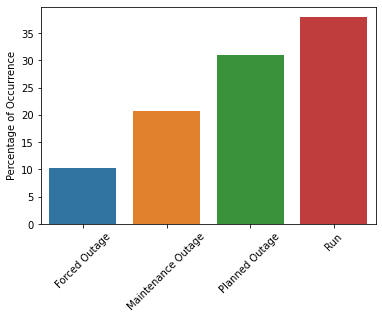

In [81]:
peakers_data_wdt_rsrve_by_stage['Percentage of Occurrence'] = (peakers_data_wdt_rsrve_by_stage['Total Occurrences']/peakers_data_wdt_rsrve_by_stage['Total Occurrences'].sum()) * 100

sns.barplot(x='Event Description', y='Percentage of Occurrence', data=peakers_data_wdt_rsrve_by_stage)
plt.xlabel(None)

plt.xticks(rotation=45)
plt.show()

In [82]:
import datetime as dt

In [96]:
peakers_data_wdt_rsrve['Start Date'] = peakers_data_wdt_rsrve['Event Start Date'].dt.date
peakers_data_wdt_rsrve_req = peakers_data_wdt_rsrve.loc[:, ['Start Date', 'Unit #', 'Event Description']]

peakers_data_wdt_rsrve_req.rename({'Unit #': 'Number of Occurrences'}, axis=1, inplace=True)

peakers_data_wdt_rsrve_req_grpby_event = peakers_data_wdt_rsrve_req.groupby(['Start Date', 'Event Description']).count().reset_index()
print(peakers_data_wdt_rsrve_req_grpby_event)

    Start Date   Event Description  Number of Occurrences
0   2019-01-07  Maintenance Outage                      3
1   2019-01-30       Forced Outage                      2
2   2019-01-30                 Run                      3
3   2019-01-31       Forced Outage                      1
4   2019-04-15      Planned Outage                      3
5   2019-05-29      Planned Outage                      3
6   2019-08-12  Maintenance Outage                      3
7   2019-09-26                 Run                      2
8   2019-11-07      Planned Outage                      3
9   2019-12-03                 Run                      3
10  2019-12-04                 Run                      3


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '2019-01-07'),
  Text(1, 0, '2019-01-30'),
  Text(2, 0, '2019-01-31'),
  Text(3, 0, '2019-04-15'),
  Text(4, 0, '2019-05-29'),
  Text(5, 0, '2019-08-12'),
  Text(6, 0, '2019-09-26'),
  Text(7, 0, '2019-11-07'),
  Text(8, 0, '2019-12-03'),
  Text(9, 0, '2019-12-04')])

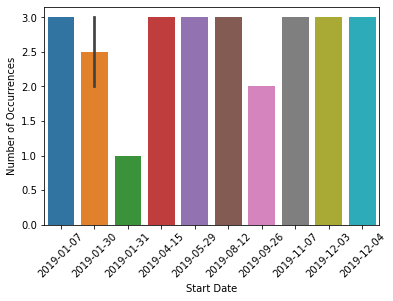

In [102]:
sns.barplot(x='Start Date', y='Number of Occurrences', data=peakers_data_wdt_rsrve_req_grpby_event)
plt.xticks(rotation=45)
